In [1]:
from engine.data_setup import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio

g:\Universe\Materials\Github Repos\Drainage-detection-topography\.venv\Lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
train_dataset = get_dataset(mode='train', name='ver7', channels=4)

In [6]:
train_dataset.images.shape

(943, 256, 256, 4)

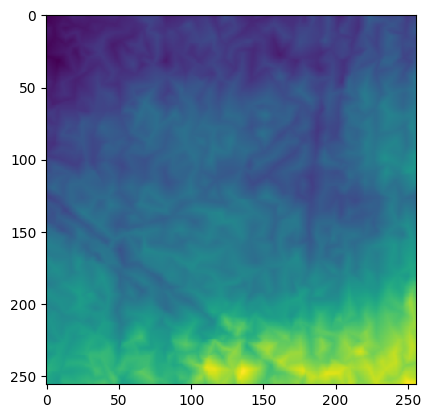

In [60]:
plt.imshow(np.transpose(train_dataset[24][0][3, :, :].unsqueeze(0), (1,2,0)))

(3, 256, 256)
(256, 256)
(256, 256, 3)
dem = None


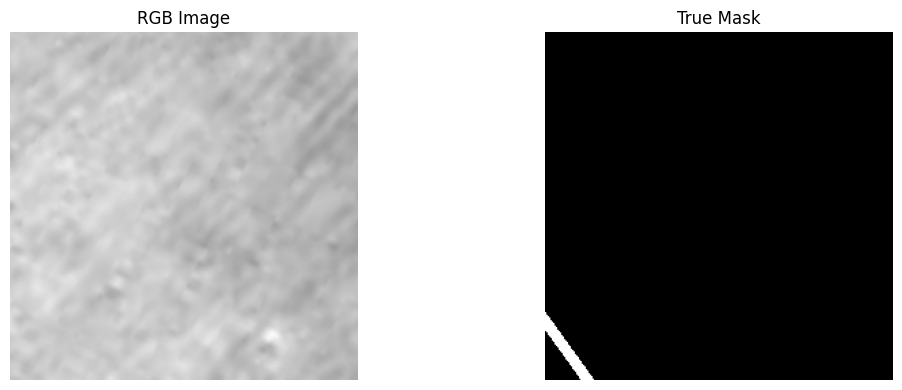

In [25]:
# 12
train_dataset.show(38, augmented=True)

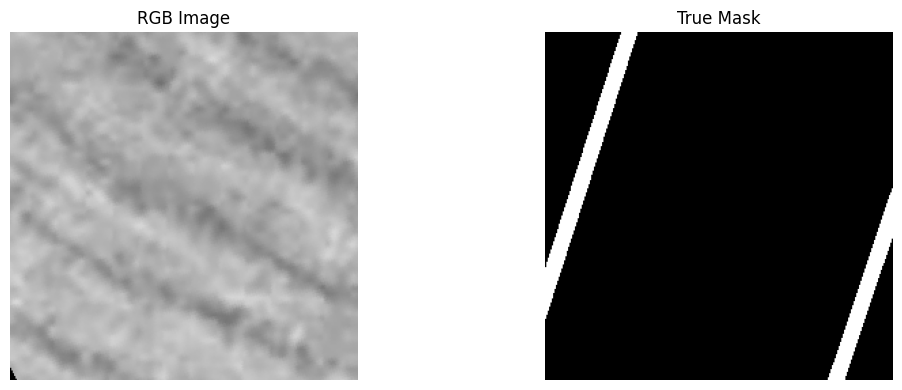

In [12]:
train_dataset2.show(0, augmented=False)

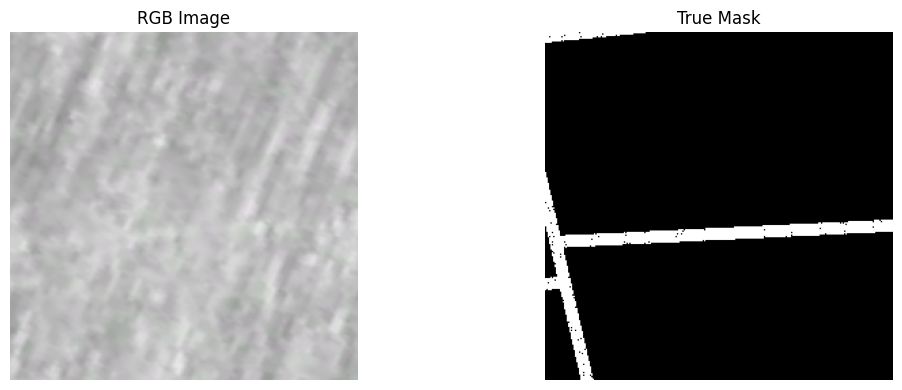

In [ ]:
train_dataset2.show(11, augmented=False)

In [4]:
print([i for i in range(len(train_dataset)) if train_dataset[i][1].sum() != 0])

[0, 9, 10, 15, 19, 20, 21, 26, 27, 34, 38, 41, 44, 57, 58, 79, 89, 93, 102, 107, 116, 120, 122, 126, 139, 140, 145, 151, 162, 177, 179, 191, 193, 194, 198, 203, 208, 216, 219, 220, 232, 249, 253, 257, 260, 271, 290, 291, 295, 298, 308, 319, 328, 339, 343, 347, 348, 349, 357, 358, 362, 367, 380, 383, 384, 388, 389, 404, 415, 416, 418, 422, 431, 432, 435, 440, 445, 448, 463, 468, 474, 487, 488, 493, 502, 504, 510, 521, 522, 534, 537, 543, 547, 553, 554, 562, 566, 573, 577, 579, 583, 589, 594, 596, 600, 601, 612, 617, 622, 627, 635, 643, 647, 655, 658, 662, 671, 674, 678, 679, 681, 682, 687, 689, 694, 701, 710, 720, 734, 735, 740, 755, 766, 777, 784, 792, 796, 797, 807, 808, 809, 816, 819, 821, 822, 827, 828, 829, 834, 835, 840, 850, 859, 868, 873, 881, 884, 886, 892, 900, 901, 908, 910, 916]


In [15]:
# Mean for ver5 data
print(f"DEM: {np.mean(train_dataset.images[:, :, :, 3])} - {np.std(train_dataset.images[:, :, :, 3])}")
print(f"R: {np.mean(train_dataset.images[:, :, :, 0])} - {np.std(train_dataset.images[:, :, :, 0])}")
print(f"G: {np.mean(train_dataset.images[:, :, :, 1])}  - {np.std(train_dataset.images[:, :, :, 1])}")
print(f"B: {np.mean(train_dataset.images[:, :, :, 2])} - {np.std(train_dataset.images[:, :, :, 2])}")

DEM: 0.43203553557395935 - 0.08720599859952927
R: 0.6237013936042786 - 0.20070211589336395
G: 0.6243346333503723  - 0.19969575107097626
B: 0.623600423336029 - 0.20078885555267334


In [39]:
with rasterio.open("./source_images/drainage_2009_rasterized.tif") as img_src, rasterio.open("./source_images/Koleno_2009_merged.tif") as mask_src:
    # CRS (координатная система проекции)
    print("Image CRS:", img_src.crs)
    print("Mask CRS:", mask_src.crs)

    # Affine transform (как пиксели переводятся в геокоординаты)
    print("Image transform:", img_src.transform)
    print("Mask transform:", mask_src.transform)

    # Размеры
    print("Image size:", img_src.width, img_src.height)
    print("Mask size:", mask_src.width, mask_src.height)

Image CRS: EPSG:3857
Mask CRS: EPSG:3857
Image transform: | 0.29, 0.00, 3340228.35|
| 0.00,-0.29, 8271731.76|
| 0.00, 0.00, 1.00|
Mask transform: | 0.29, 0.00, 3340228.35|
| 0.00,-0.29, 8271731.76|
| 0.00, 0.00, 1.00|
Image size: 7263 9020
Mask size: 7263 9020
